Aby uruchomić program.jl wystarczy wpisać w konsolę julia program.jl Program zapisze wykresy odpowiadające wykresom funkcji oraz wykresy odpowiadające liczbom dokładnych cyfr wyników otrzymanych dla każdej z tych funkcji za pomocą metod trapezów, Simpsona i Romberga i zakończy działanie.

Biblioteka QuadGK używana jest do przybliżonego określenia poprawnych wartości całek.

In [1]:
using QuadGK

Poniżej znajduje się implementacja złożonej metody trapezów. Jako argumenty przyjmuje kolejno funkcję, z której ma zostać policzona przybliżona całka, początek przedziału całkowania, koniec przedziału całkowania i liczbę przedziałów na którą ma zostać podzielony przedział.

In [2]:
function metoda_zlozona_trapezow(f::Function, a::Float64, b::Float64, n::Int64)
    suma = 0.0
    h = (b-a)/Float64(n)
    for i = 1 : n-1
        suma = suma + f(a + i*h)
    end
    wynik = 0.5*h*(f(a) + f(b) + 2*suma)
    return wynik
end

metoda_zlozona_trapezow (generic function with 1 method)

Poniższa funkcja oblicza wartości złożonej metody trapezów dla 2^0, 2^1, ..., 2^n przedziałów, z czego przy obliczaniu 2^(k+1) korzysta z wartości obliczonej dla 2^k z własności podanej i udowodnionej w sprawozdaniu. Argumenty analogiczne do metoda_zlozona_trapezow. Wyniki zwraca w postaci tablicy n+1 elementowej.

In [3]:
function metoda_zlozona_trapezow_posrednie_do_exp_2_n(f::Function, a::Float64, b::Float64, n::Int64)
    wyniki = zeros(Float64, n+1)
    h = (b-a)
    wyk = 1
    x_i = 0.0
    wyniki[1] = 0.5*h*(f(a) + f(b))
    for k = 1 : n
        suma = 0.0
        h = h/2
        for i = 1 : wyk
            suma = suma + f(a+(2*i-1)*h)
        end
        wyniki[k+1] = 0.5 * wyniki[k] + h * suma
        wyk = wyk*2
    end
    return wyniki
end

metoda_zlozona_trapezow_posrednie_do_exp_2_n (generic function with 1 method)

Poniżej znajduje się implementacja złożonej metody Simpsona. Jako argumenty przyjmuje kolejno funkcję, z której ma zostać policzona przybliżona całka, początek przedziału całkowania, koniec przedziału całkowania i liczbę przedziałów na którą ma zostać podzielony przedział.

In [4]:
function metoda_zlozona_simpsona(f::Function, a::Float64, b::Float64, n::Int64)
    if n % 2 == 1
        n = n + 1
    end
    suma1 = 0.0
    suma2 = 0.0
    h = (b-a)/Float64(n)
    for i = 1 : n/2
        suma1 = suma1 + f(a + (2*i-1)*h)
    end
    for i = 1 : (n/2)-1
        suma2 = suma2 + f(a + 2*i*h)
    end
    wynik = h*(f(a) + f(b) + 4*suma1 + 2*suma2)/3.0
    return wynik
end

metoda_zlozona_simpsona (generic function with 1 method)

Poniższa funkcja oblicza wartości złożonej metody Simpsona dla 2^0, 2^1, ..., 2^n przedziałów. Argumenty analogiczne do metoda_zlozona_simpsona. Wyniki zwraca w postaci tablicy n+1 elementowej.

In [5]:
function metoda_zlozona_simpsona_posrednie_do_exp_2_n(f::Function, a::Float64, b::Float64, n::Int64)
    wyniki = zeros(Float64, n+1)
    wyk = Int64(1)
    wyniki[1] = (b-a)/6.0 * (f(a) + f(b) + 4* f((b+a)/2.0) )
    for i = 1 : n
        wyk = wyk * 2
        wyniki[i+1] = metoda_zlozona_simpsona(f, a, b, wyk)
    end
    return wyniki
end

metoda_zlozona_simpsona_posrednie_do_exp_2_n (generic function with 1 method)

Poniżej znajduje się implementacja złożonej metody Romberga. Jako argumenty przyjmuje kolejno funkcję, z której ma zostać policzona przybliżona całka, początek przedziału całkowania, koniec przedziału całkowania i liczbę iteracji metody Romberga. Zwraca wartość ostaniej iteracji.

In [6]:
function metoda_romberga(f::Function, a::Float64, b::Float64, n::Int64)
    R = metoda_zlozona_trapezow_posrednie_do_exp_2_n(f, a, b, n)
    pot4 = 1.0
    for k = 1 : n
        pot4 = pot4 * 4.0
        for i = n :-1: k
            R[i+1] = (pot4 * R[i+1] - R[i])/(pot4 - 1)
        end
    end
    return R[n+1]
end

metoda_romberga (generic function with 1 method)

Poniższa funkcja oblicza wartości złożonej metody Romberga dla 2^0, 2^1, ..., 2^n przedziałów. Argumenty analogiczne do metoda_romberga. Wyniki zwraca w postaci tablicy n+1 elementowej.

In [7]:
function metoda_romberga_posrednie_do_n(f::Function, a::Float64, b::Float64, n::Int64)
    R = metoda_zlozona_trapezow_posrednie_do_exp_2_n(f, a, b, n)
    pot4 = 1.0
    for k = 1 : n
        pot4 = pot4 * 4.0
        for i = n :-1: k
            R[i+1] = (pot4 * R[i+1] - R[i])/(pot4 - 1)
        end
    end
    return R
end

metoda_romberga_posrednie_do_n (generic function with 1 method)

Biblioteka Plots używana jest do rysowania wykresów funkcji i wykresów odpowiadających liczbom dokładnych cyfr wyników otrzymanych dla każdej z tych funkcji za pomocą metod trapezów, Simpsona i Romberga

In [8]:
using Plots

Poniższa funkcja przyjmuje argumenty analogiczne do metoda_romberga_posrednie_do_n i zwraca wykres liczb dokładnych cyfr wyników otrzymanych dla podanej funkcji za pomocą metod trapezów, Simpsona i Romberga

In [9]:
function testowanie(f::Function, a::Float64, b::Float64, n::Int64)
    wyniki_trapezy = metoda_zlozona_trapezow_posrednie_do_exp_2_n(f, a, b, n)
    wyniki_simpsona = metoda_zlozona_simpsona_posrednie_do_exp_2_n(f, a, b, n)
    wyniki_romberga = metoda_romberga_posrednie_do_n(f, a, b, n)
    x = 0:n
    poprawny_wynik = first(quadgk(f, a, b))
    dokladne_cyfry_trapezy = [-log2(abs((wyniki_trapezy[i]-poprawny_wynik)/poprawny_wynik)) for i = 1 : n+1]
    dokladne_cyfry_simpsona = [-log2(abs((wyniki_simpsona[i]-poprawny_wynik)/poprawny_wynik)) for i = 1 : n+1]
    dokladne_cyfry_romberga = [-log2(abs((wyniki_romberga[i]-poprawny_wynik)/poprawny_wynik)) for i = 1 : n+1]
    pl = plot(x, dokladne_cyfry_trapezy, seriestype = :line, xticks=0:1:n, shape=:circle, ms=4, lw=3,
    title="Liczba dokladnych cyfr", label=["Trapezy", "Simpsona", "Romberga"], legend = :topleft)
    plot!(x, dokladne_cyfry_simpsona, seriestype = :line, xticks=0:1:n, shape=:circle, ms=4, lw=3,
    title="Liczba dokladnych cyfr", label=["Trapezy", "Simpsona", "Romberga"], legend = :topleft)
    plot!(x, dokladne_cyfry_romberga, seriestype = :line, xticks=0:1:n, shape=:circle, ms=4, lw=3,
    title="Liczba dokladnych cyfr", label=["Trapezy", "Simpsona", "Romberga"], legend = :topleft)
    return pl
end

testowanie (generic function with 1 method)

Poniżej znajdują się wykresy przykładowych funkcji i wykresy dokładnych cyfr wyników zastosowanych do nich metod numerycznych

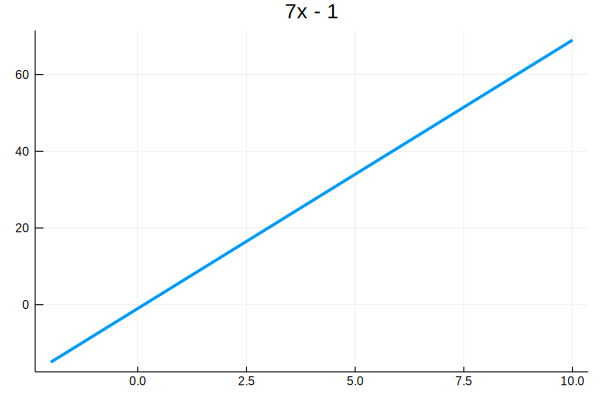

In [10]:
plot(-2:0.001:10, x -> (7x -1), seriestype = :line, lw=3, 
    title="7x - 1", legend = :none)

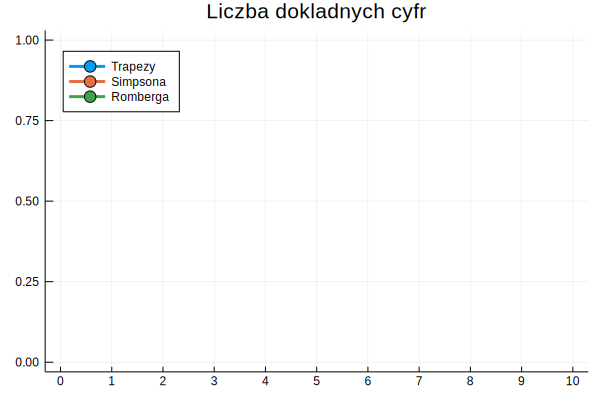

In [11]:
testowanie(x -> 7x - 1, -2.0, 10.0, Int64(10.0))

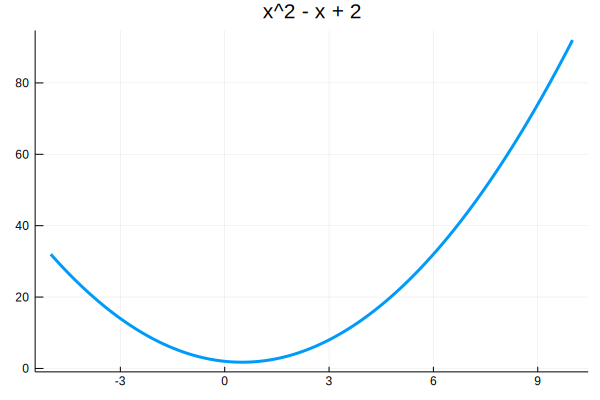

In [12]:
plot(-5:0.001:10, x -> x^2 - x + 2, seriestype = :line, lw=3,
    title="x^2 - x + 2", legend = :none)

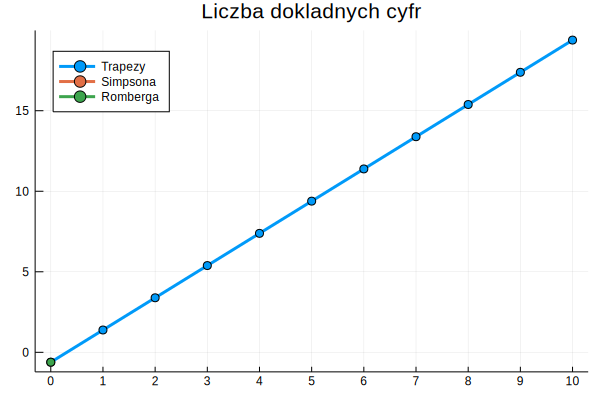

In [13]:
testowanie(x -> x^2 - x + 2, -5.0, 10.0, Int64(10.0))

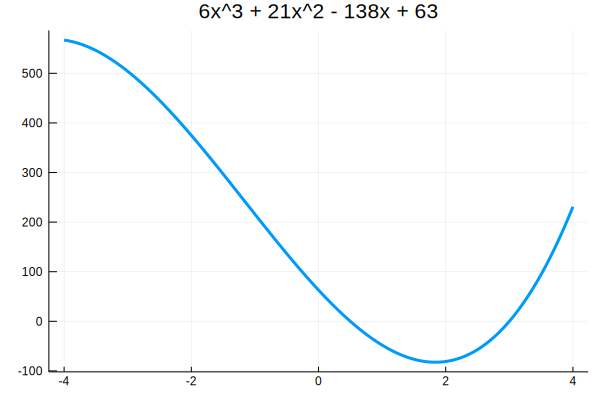

In [14]:
plot(-4:0.001:4, x -> 6x^3 + 21x^2 - 138x + 63, seriestype = :line, lw=3,
    title="6x^3 + 21x^2 - 138x + 63", legend = :none)

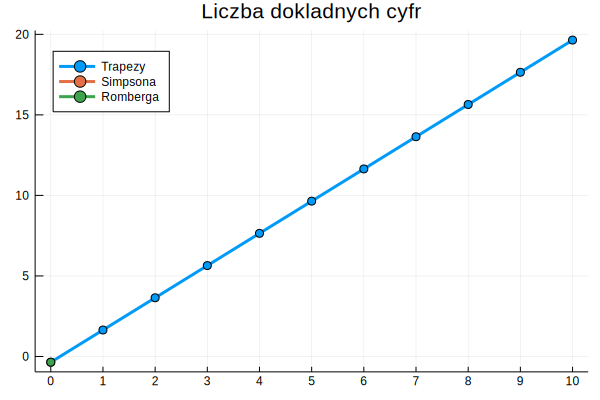

In [15]:
testowanie(x -> 6x^3 + 21x^2 - 138x + 63, -4.0, 4.0, Int64(10.0))

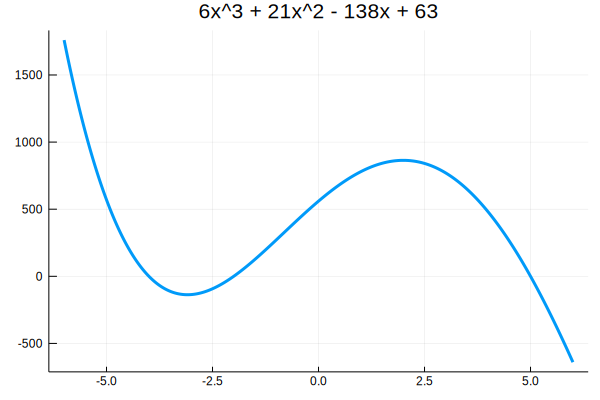

In [16]:
plot(-6:0.001:6, x -> x^4 - 13x^3 - 36x^2 + 268x + 560, seriestype = :line,  lw=3,
    title="6x^3 + 21x^2 - 138x + 63", legend = :none)

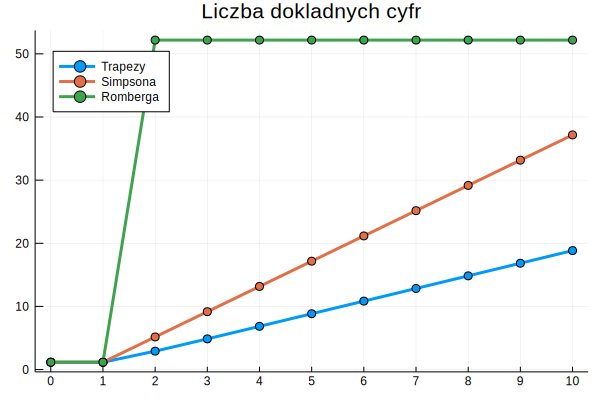

In [17]:
testowanie(x -> x^4 - 13x^3 - 36x^2 + 268x + 560, -6.0, 6.0, Int64(10.0))

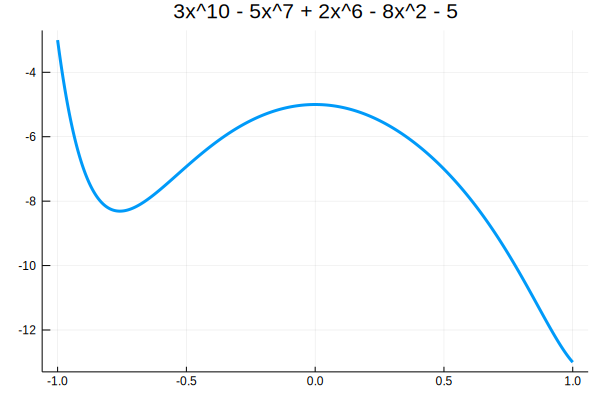

In [18]:
plot(-1:0.001:1, x ->  3*x^10 - 5*x^7 + 2*x^6 - 8*x^2 - 5, seriestype = :line, lw=3,
    title=" 3x^10 - 5x^7 + 2x^6 - 8x^2 - 5", legend = :none)

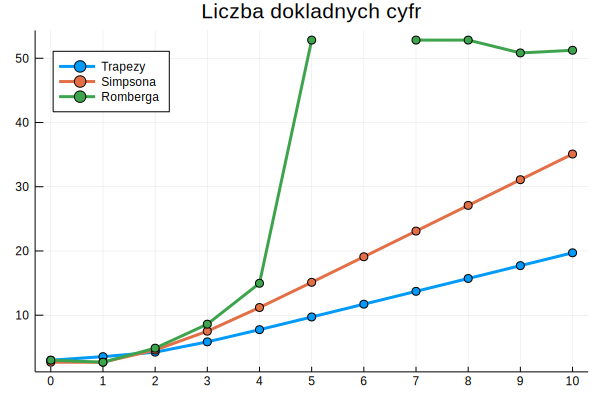

In [19]:
testowanie(x -> 3x^10 - 5*x^7 + 2*x^6 - 8*x^2 - 5, -1.0, 1.0, Int64(10.0))

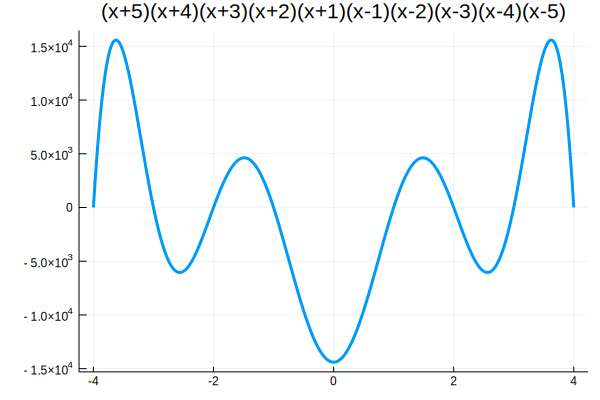

In [20]:
plot(-4:0.001:4, x -> (x+5)*(x+4)*(x+3)*(x+2)*(x+1)*(x-1)*(x-2)*(x-3)*(x-4)*(x-5), seriestype = :line, lw=3,
    title="(x+5)(x+4)(x+3)(x+2)(x+1)(x-1)(x-2)(x-3)(x-4)(x-5)", legend = :none)

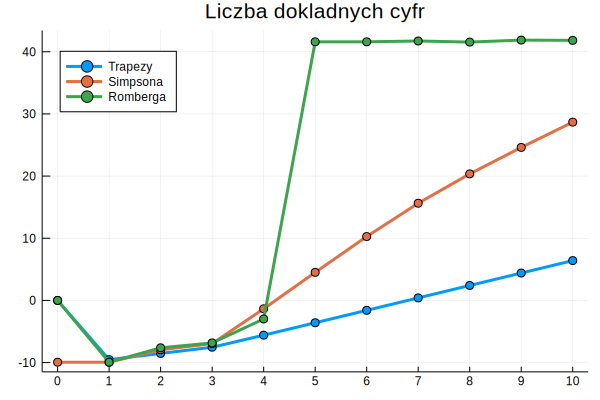

In [21]:
testowanie(x -> (x+5)*(x+4)*(x+3)*(x+2)*(x+1)*(x-1)*(x-2)*(x-3)*(x-4)*(x-5), -4.0, 4.0, Int64(10.0))

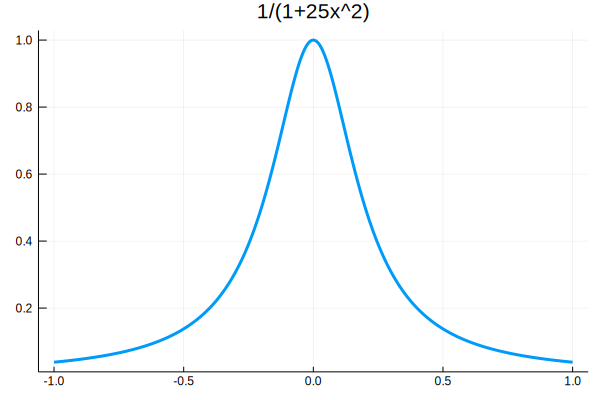

In [22]:
plot(-1:0.001:1, x -> 1.0/(1.0+25.0*x*x), seriestype = :line, lw=3,
    title="1/(1+25x^2)", legend = :none)

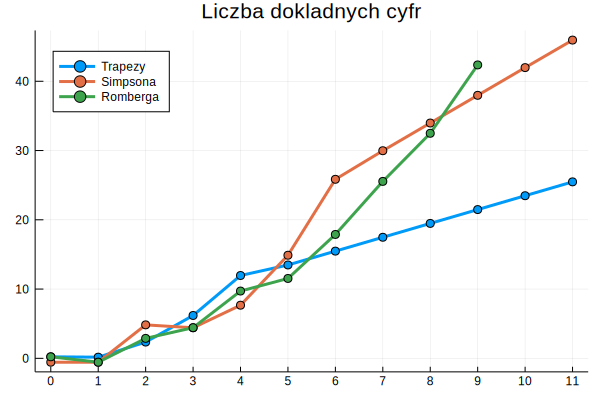

In [23]:
testowanie(x -> 1.0/(1.0+25.0*x^2), -1.0, 1.0, Int64(11.0))

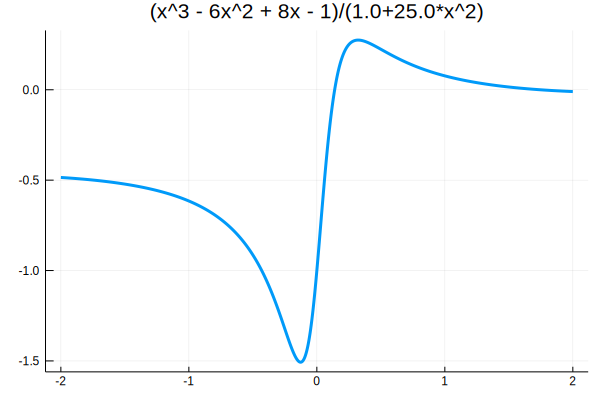

In [24]:
plot(-2:0.001:2, x -> (x^3 - 6x^2 + 8x - 1)/(1.0+25.0*x^2), seriestype = :line, lw=3,
    title="(x^3 - 6x^2 + 8x - 1)/(1.0+25.0*x^2)", legend = :none)

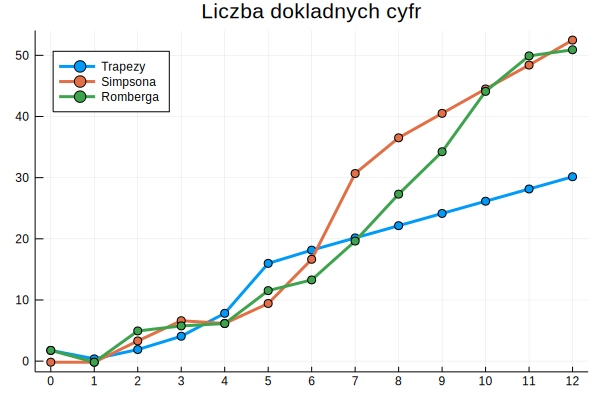

In [25]:
testowanie(x -> (x^3 - 6x^2 + 8x - 1)/(1.0+25.0*x^2), -2.0, 2.0, Int64(12.0))

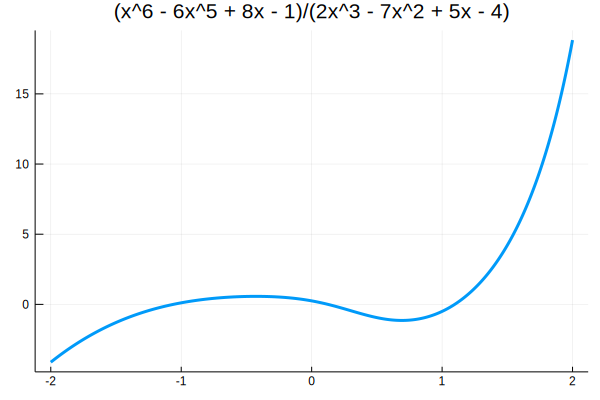

In [26]:
plot(-2:0.001:2, x -> (x^6 - 6x^5 + 8x - 1)/(2x^3 - 7x^2 + 5x - 4), seriestype = :line, lw=3,
    title="(x^6 - 6x^5 + 8x - 1)/(2x^3 - 7x^2 + 5x - 4)", legend = :none)

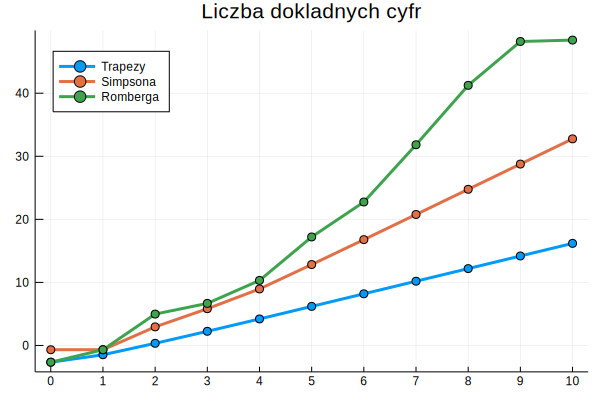

In [27]:
testowanie(x -> (x^6 - 6x^5 + 8x - 1)/(2x^3 - 7x^2 + 5x - 4), -2.0, 2.0, Int64(10.0))

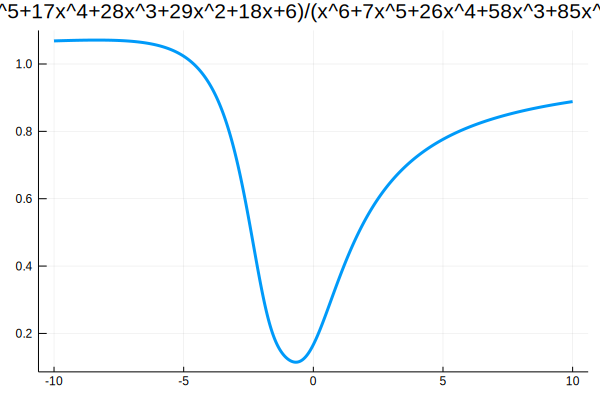

In [28]:
plot(-10:0.001:10, x -> (x^6 + 6x^5 + 17x^4 + 28x^3 + 29x^2 + 18x + 6)/(x^6 + 7x^5 + 26x^4 + 58x^3 + 85x^2 + 75x + 36), 
    seriestype = :line, lw=3, 
    title="(x^6+6x^5+17x^4+28x^3+29x^2+18x+6)/(x^6+7x^5+26x^4+58x^3+85x^2+75x+36)", legend = :none)

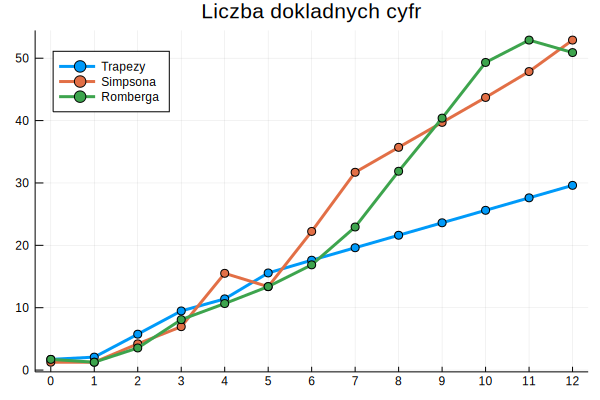

In [29]:
testowanie(x -> (x^6 + 6x^5 + 17x^4 + 28x^3 + 29x^2 + 18x + 6)/(x^6 + 7x^5 + 26x^4 + 58x^3 + 85x^2 + 75x + 36), 
    -10.0, 10.0, Int64(12.0))

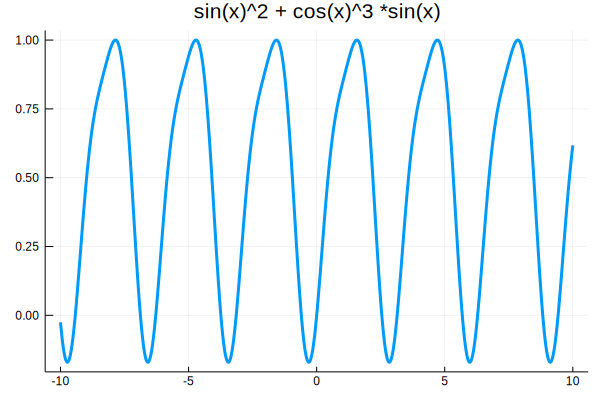

In [30]:
plot(-10:0.001:10, x -> sin(x)^2 + cos(x)^3 *sin(x), 
    seriestype = :line, lw=3, title="sin(x)^2 + cos(x)^3 *sin(x)", legend = :none)

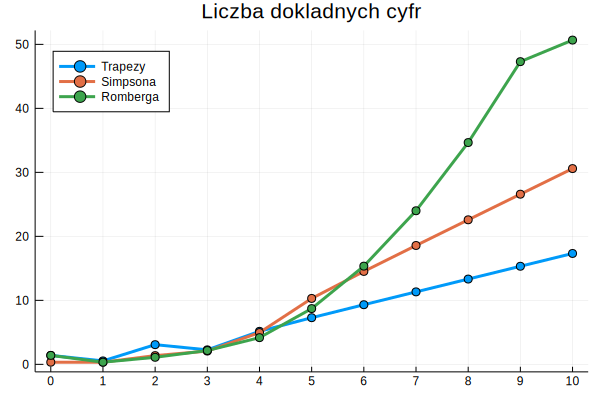

In [31]:
testowanie(x -> sin(x)^2 + cos(x)^3 *sin(x), -10.0, 10.0, Int64(10.0))

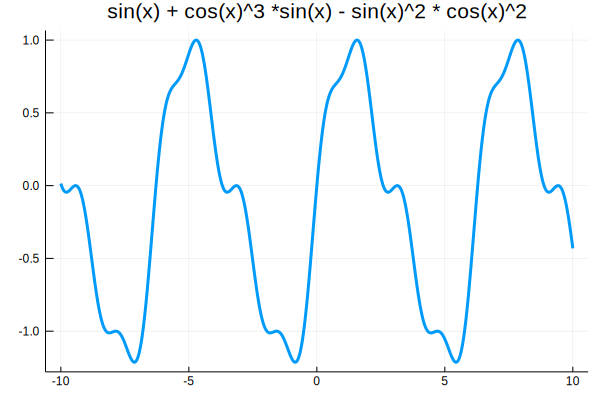

In [32]:
plot(-10:0.001:10, x -> sin(x) + cos(x)^3 *sin(x) - sin(x)^2 * cos(x)^2, 
    seriestype = :line, lw=3, title="sin(x) + cos(x)^3 *sin(x) - sin(x)^2 * cos(x)^2", legend = :none)

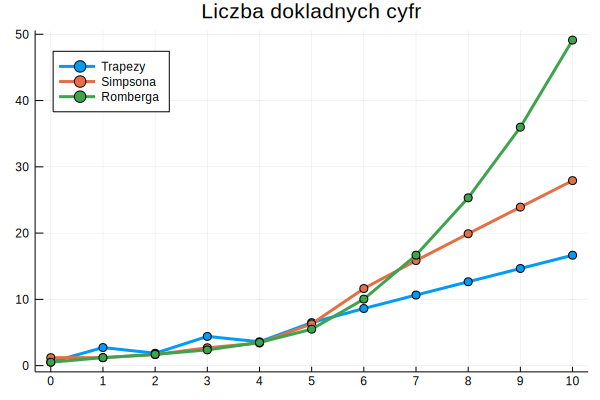

In [33]:
testowanie(x -> sin(x) + cos(x)^3 *sin(x) - sin(x)^2 * cos(x)^2, -10.0, 10.0, Int64(10.0))

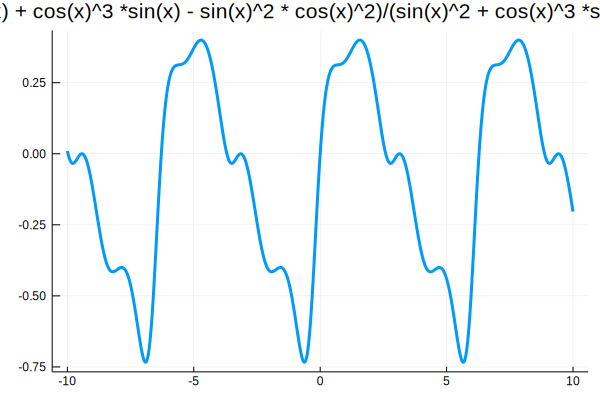

In [34]:
plot(-10:0.001:10, x -> (sin(x) + cos(x)^3 *sin(x) - sin(x)^2 * cos(x)^2)/(sin(x)^2 + cos(x)^3 *sin(x)+1.5), 
    seriestype = :line, lw=3, 
    title="(sin(x) + cos(x)^3 *sin(x) - sin(x)^2 * cos(x)^2)/(sin(x)^2 + cos(x)^3 *sin(x)+1.5)", legend = :none)

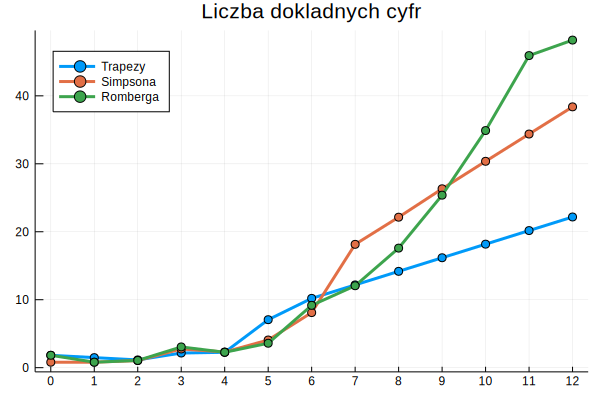

In [35]:
testowanie(x -> (sin(x) + cos(x)^3 *sin(x) - sin(x)^2 * cos(x)^2)/(sin(x)^2 + cos(x)^3 *sin(x) + 1.5), -10.0, 10.0, Int64(12.0))

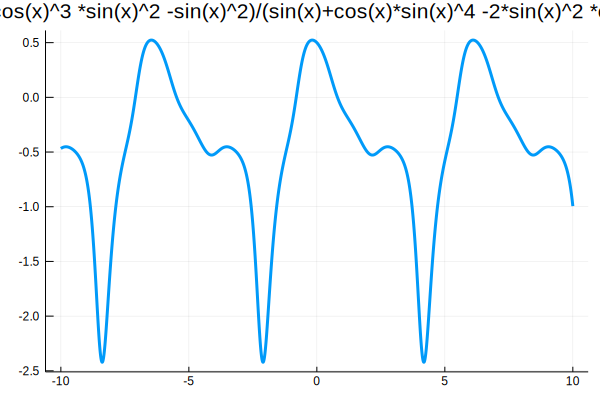

In [36]:
plot(-10:0.001:10, x -> (cos(x) - cos(x)^3 * sin(x)^2 - sin(x)^2)/(sin(x) + cos(x) *sin(x)^4 - 2*sin(x)^2 * cos(x)^2 + 2), 
    seriestype = :line, lw=3, 
    title="(cos(x)-cos(x)^3 *sin(x)^2 -sin(x)^2)/(sin(x)+cos(x)*sin(x)^4 -2*sin(x)^2 *cos(x)^2 +2)", legend = :none)

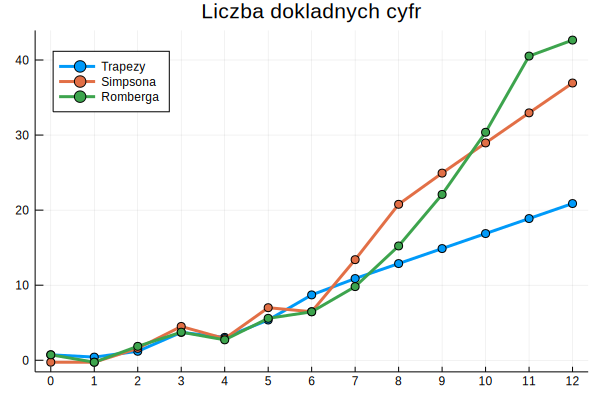

In [37]:
testowanie(x -> (cos(x) - cos(x)^3 * sin(x)^2 - sin(x)^2)/(sin(x) + cos(x) *sin(x)^4 - 2*sin(x)^2 * cos(x)^2 + 2), -10.0, 10.0, Int64(12.0))